# Chromatic Harmony: Algorithmic Graph Coloring for Minimum Color Usage in Vertices

## 1. Graph Creation and Visualization

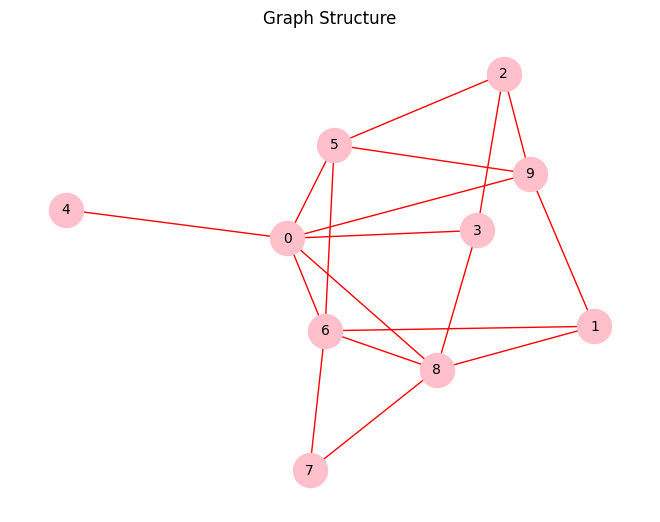

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph and add edges

# Custom Graph
# G = nx.Graph()
# G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 5), (2, 5), (3, 5), (4, 5)])

# Erdos-Renyi Graph
G = nx.erdos_renyi_graph(10,0.4)

pos = nx.kamada_kawai_layout(G)   # Kamada Kawai Layout

nx.draw(G,pos,with_labels=True,node_color='pink',node_size=600,font_size=10,edge_color='red')
plt.title('Graph Structure')
plt.show()

## 2. Algorithm for Chromatic Numbering

In [35]:
def chromatic_number(graph):
    coloring = {}  # Dictionary to store vertex-color mapping

    # Iterate through each vertex in the graph
    for node in graph.nodes():
        # Initialize a set of available colors
        available_colors = set(range(len(graph)))

        # Check neighboring vertices and remove their colors from available_colors
        for neighbor in graph.neighbors(node):
            if neighbor in coloring:
                available_colors.discard(coloring[neighbor])

        # Assign the smallest available color to the current node
        if available_colors:
            coloring[node] = min(available_colors)

    # The number of colors used is the chromatic number
    chromatic_number = max(coloring.values()) + 1

    return coloring, chromatic_number

# Get the chromatic coloring and number
coloring, chromatic_num = chromatic_number(G)

print("Chromatic Coloring:", coloring)
print("Chromatic Number:", chromatic_num)

Chromatic Coloring: {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 0, 8: 3, 9: 2}
Chromatic Number: 4


## 3. Graph Coloring based on Chromatic Numbering

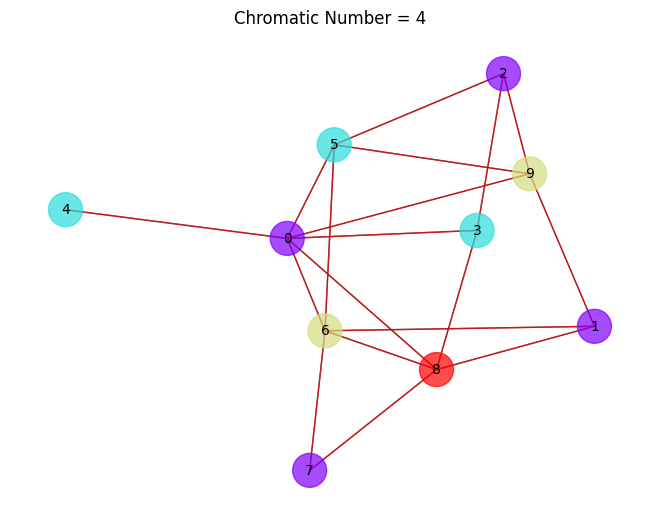

In [36]:
# List of colors for visualization
colors = [coloring[node] for node in G.nodes()]

# Define a colormap for visualization
cmap = plt.get_cmap("rainbow", max(colors) + 1)

# Draw the graph with assigned colors
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_color=colors, cmap=cmap, node_size=600, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
nx.draw_networkx_edges(G, pos, edge_color="red", alpha=0.7)
plt.title(f'Chromatic Number = {chromatic_num}')
plt.show()